# 분류 분석 로지스틱 회귀 분석을 이용한 유방암 진단 프로젝트

### 1) 데이터 수집

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [2]:
b_cancer = load_breast_cancer()

### 2) 데이터 수집 및 탐색

In [3]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

In [5]:
b_cancer_df['diagnosis']= b_cancer.target

In [6]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
print('유방암 진단 데이터셋 크기 : ', b_cancer_df.shape)

유방암 진단 데이터셋 크기 :  (569, 31)


In [8]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [11]:
print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [12]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


### 3) 분석 모델 구축 : 로지스틱 회귀를 이용한 이진 분류 모델

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 

In [15]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [16]:
# 로지스틱 회귀 분석 : (1)모델 생성
lr_b_cancer = LogisticRegression()

In [17]:
# 로지스틱 회귀 분석 : (2)모델 훈련
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)
Y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [40]:
!pip install matplotlib

### 4) 결과 분석 

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [20]:
# 오차 행렬 
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [21]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [34]:
roc_auc

0.9715608465608465

In [22]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


In [23]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


In [24]:
!pip install IPython

In [26]:
from IPython.display import Image

In [30]:
## 주피터에 이미지 넣기

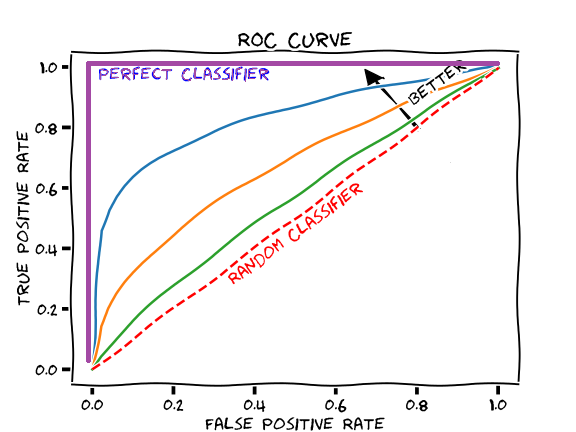

In [29]:
Image("https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png")

## 마크다운으로 이미지 넣기

![roc_auc](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png)https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png

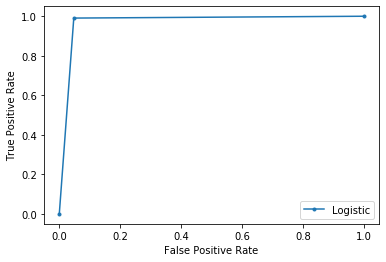

In [43]:
# X_train, X_test, Y_train, Y_test
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(Y_test, Y_predict)
 
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()